In [ ]:
from google.colab import files
uploaded = files.upload()


Saving creditless_loan_approval_data.csv to creditless_loan_approval_data.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('creditless_loan_approval_data.csv')
data.head()


,Name,Age,Past_Loan_Records,Utility_Rent_Payment_History,Bank_Statements,Income_Stability,Employment,Spending_Percentage,Education,Digital_Payments_Timeliness,Loan_Approval
0,Jennifer Wiley,59,1,1,4.91,0.54,1,0.46,1,0,1
1,Brittany Kennedy,49,0,0,5.83,0.42,0,0.57,1,0,0
2,Johnathan Boyle,35,0,1,11.25,0.81,0,0.58,1,0,0
3,Cheryl Smith,28,0,1,5.38,0.38,0,0.48,1,0,0
4,Amy Suarez,41,0,1,5.10,0.75,0,0.52,1,0,0


In [ ]:
data

,Name,Age,Past_Loan_Records,Utility_Rent_Payment_History,Bank_Statements,Income_Stability,Employment,Spending_Percentage,Education,Digital_Payments_Timeliness,Loan_Approval
0,Jennifer Wiley,59,1,1,4.91,0.54,1,0.46,1,0,1
1,Brittany Kennedy,49,0,0,5.83,0.42,0,0.57,1,0,0
2,Johnathan Boyle,35,0,1,11.25,0.81,0,0.58,1,0,0
3,Cheryl Smith,28,0,1,5.38,0.38,0,0.48,1,0,0
4,Amy Suarez,41,0,1,5.10,0.75,0,0.52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Barbara Wallace,58,1,0,3.05,0.79,0,0.52,1,1,0
996,Joseph Butler,22,1,1,10.17,0.59,0,0.61,1,0,1
997,Victoria Nguyen,27,1,1,9.81,0.27,0,0.34,1,0,0
998,Marvin Ryan,38,0,1,7.84,0.98,0,0.55,2,0,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split into features (X) and target (y)
X = data.drop(columns=["Name", "Loan_Approval"])  # Drop 'Name' and target column
y = data["Loan_Approval"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model initialization with class weights to handle imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       151
           1       1.00      0.90      0.95        49

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.98      0.97      0.97       200



In [ ]:
# Prediction example with a custom threshold for new entries
# Define the feature names in the same order as in the original dataset
feature_names = ["Age", "Past_Loan_Records", "Utility_Rent_Payment_History", "Bank_Statements",
                 "Income_Stability", "Employment", "Spending_Percentage", "Education",
                 "Digital_Payments_Timeliness"]

In [ ]:
# New entry examples (adjust values to reflect realistic test cases)
new_entry1 = [28, 1, 1, 8.5, 0.9, 1, 0.5, 2, 1]  # Likely approval case
new_entry2 = [0, 0, 0, 0, 0, 0, 0, 0, 0]         # Likely rejection case

In [ ]:
# Convert entries to DataFrames with correct feature names
new_entry1_df = pd.DataFrame([new_entry1], columns=feature_names)
new_entry2_df = pd.DataFrame([new_entry2], columns=feature_names)

In [ ]:
# Prediction with probability and custom threshold
threshold = 0.7  # Set higher threshold for approval

In [ ]:
# Predict for new_entry1
y_prob1 = model.predict_proba(new_entry1_df)[:, 1]  # Probability of approval (class 1)
new_prediction1 = (y_prob1 >= threshold).astype(int)
print("Loan Approval Prediction for new_entry1 (1 = Approved, 0 = Rejected):", new_prediction1)

Loan Approval Prediction for new_entry1 (1 = Approved, 0 = Rejected): [1]


In [ ]:
# Predict for new_entry2
y_prob2 = model.predict_proba(new_entry2_df)[:, 1]  # Probability of approval (class 1)
new_prediction2 = (y_prob2 >= threshold).astype(int)
print("Loan Approval Prediction for new_entry2 (1 = Approved, 0 = Rejected):", new_prediction2)


Loan Approval Prediction for new_entry2 (1 = Approved, 0 = Rejected): [0]


In [ ]:
new_entry3 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
new_entry3_df = pd.DataFrame([new_entry3], columns=feature_names)
y_prob3 = model.predict_proba(new_entry3_df)[:, 1]  # Probability of approval (class 1)
new_prediction3 = (y_prob3 >= threshold).astype(int)
print("Loan Approval Prediction for new_entry2 (1 = Approved, 0 = Rejected):", new_prediction3)


Loan Approval Prediction for new_entry2 (1 = Approved, 0 = Rejected): [0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd

# Example data
data = pd.DataFrame({
    'Age': [25, 30, 45],
    'Past_Loan_Records': [1, 0, 1],
    'Utility_Rent_Payment_History': [1, 1, 0],
    'Bank_Statements': [5000, 3000, 10000],
    'Income_Stability': [1, 1, 0],
    'Employment': [1, 0, 1],
    'Spending_Percentage': [0.3, 0.4, 0.2],
    'Education': [1, 2, 1],
    'Digital_Payments_Timeliness': [1, 0, 1],
    'Loan_Approval': [1, 0, 1]  # Target variable
})

X = data.drop('Loan_Approval', axis=1)
y = data['Loan_Approval']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [ ]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

               Name  Age  Past_Loan_Records  Utility_Rent_Payment_History  \
0    Jennifer Wiley   59                  1                             1   
1  Brittany Kennedy   49                  0                             0   
2   Johnathan Boyle   35                  0                             1   
3      Cheryl Smith   28                  0                             1   
4        Amy Suarez   41                  0                             1   

   Bank_Statements  Income_Stability  Employment  Spending_Percentage  \
0             4.91              0.54           1                 0.46   
1             5.83              0.42           0                 0.57   
2            11.25              0.81           0                 0.58   
3             5.38              0.38           0                 0.48   
4             5.10              0.75           0                 0.52   

   Education  Digital_Payments_Timeliness  Loan_Approval  
0          1                           

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

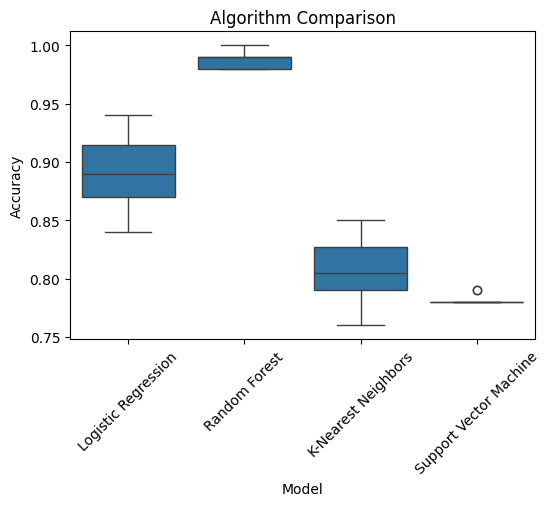

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditless_loan_approval_data.csv')

# Display the first few rows and check data types
print(data.head())
print(data.dtypes)

# Check for non-numeric columns and handle them
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# If there are non-numeric columns, handle them
# Drop non-numeric columns if they are not useful for prediction
data = data.drop(non_numeric_cols, axis=1)

# Define features and target variable
X = data.drop('Loan_Approval', axis=1)
y = data['Loan_Approval']

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Evaluate each model using cross-validation and store results
results = []
for model_name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(pd.DataFrame({'Model': model_name, 'Accuracy': cv_results}))

# Concatenate all results for easy plotting
results_df = pd.concat(results, ignore_index=True)

# Create the box plot to compare algorithms
plt.figure(figsize=(6, 4))
sns.boxplot(x='Model', y='Accuracy', data=results_df)
plt.title('Algorithm Comparison')
plt.xticks(rotation=45)
plt.show()


Non-numeric columns: Index(['Name'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


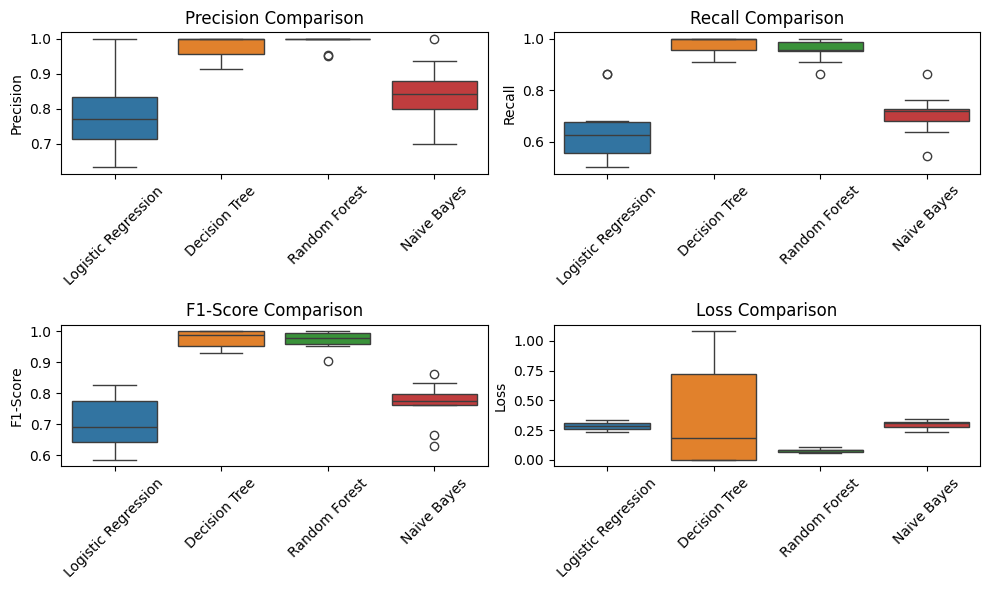

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditless_loan_approval_data.csv')

# Check for non-numeric columns and encode or drop them
non_numeric_cols = data.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns:", non_numeric_cols)
    # Drop non-numeric columns (you could also encode if these are needed)
    data = data.drop(non_numeric_cols, axis=1)

# Define features and target variable
X = data.drop('Loan_Approval', axis=1)
y = data['Loan_Approval']

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Define custom scorers for precision, recall, f1-score, and loss
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'loss': make_scorer(log_loss, needs_proba=True, greater_is_better=False)
}

# Evaluate each model and store results
results = {}
for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=10, scoring=scoring, error_score='raise')
    results[model_name] = {
        'Precision': cv_results['test_precision'],
        'Recall': cv_results['test_recall'],
        'F1-Score': cv_results['test_f1'],
        'Loss': -cv_results['test_loss']  # Use -ve since log_loss scoring is negative
    }

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame({
    metric: [np.mean(results[model][metric]) for model in results.keys()]
    for metric in ['Precision', 'Recall', 'F1-Score', 'Loss']
}, index=models.keys())

# Plot Precision, Recall, F1-Score, and Loss for each model
metrics = ['Precision', 'Recall', 'F1-Score', 'Loss']
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=pd.DataFrame({model: results[model][metric] for model in results.keys()}))
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Non-numeric columns: Index(['Name'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
<ipython-input-32-017b7902623c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
<ipython-input-32-017b7902623c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
<ipython-input-32-017b7902623c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is 

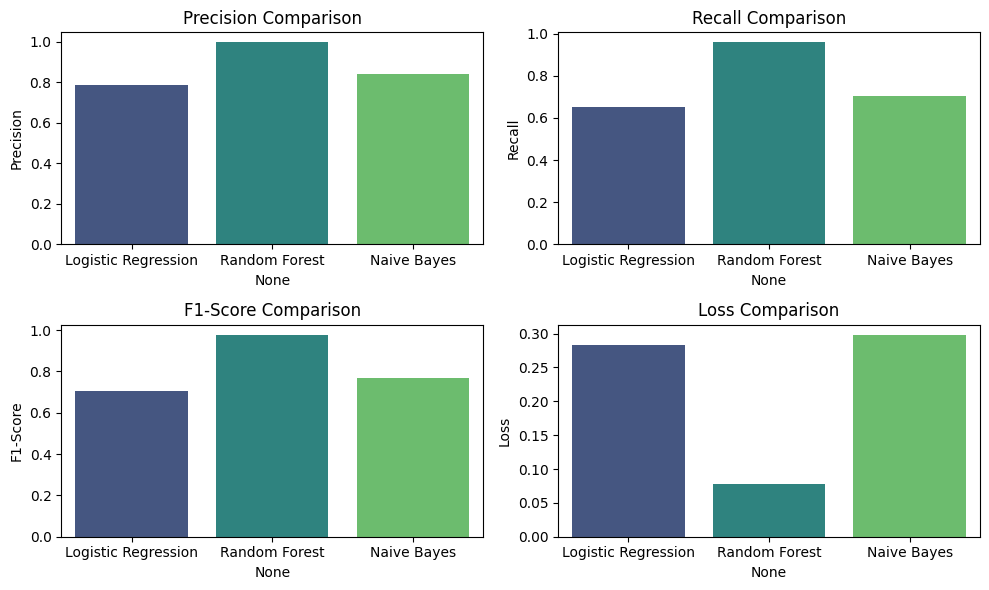

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditless_loan_approval_data.csv')

# Check for non-numeric columns and encode or drop them
non_numeric_cols = data.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns:", non_numeric_cols)
    # Drop non-numeric columns (you could also encode if these are needed)
    data = data.drop(non_numeric_cols, axis=1)

# Define features and target variable
X = data.drop('Loan_Approval', axis=1)
y = data['Loan_Approval']

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Define custom scorers for precision, recall, f1-score, and loss
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'loss': make_scorer(log_loss, needs_proba=True, greater_is_better=False)
}

# Evaluate each model and store results
results = {}
for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=10, scoring=scoring, error_score='raise')
    results[model_name] = {
        'Precision': cv_results['test_precision'],
        'Recall': cv_results['test_recall'],
        'F1-Score': cv_results['test_f1'],
        'Loss': -cv_results['test_loss']  # Use -ve since log_loss scoring is negative
    }

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame({
    metric: [np.mean(results[model][metric]) for model in results.keys()]
    for metric in ['Precision', 'Recall', 'F1-Score', 'Loss']
}, index=models.keys())

# Plot Precision, Recall, F1-Score, and Loss for each model using barplots
metrics = ['Precision', 'Recall', 'F1-Score', 'Loss']
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()
